In [ ]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
# Downloading stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/blogtext.csv')

In [ ]:
df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


In [ ]:
# Dropping useless columns
#df1 = df.drop(['id','date','sign'], axis=1)
df.drop(labels=['id','date'], axis=1,inplace=True)

In [ ]:
df

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...
681279,male,23,Student,Taurus,"Dear Susan, I could write some really ..."
681280,male,23,Student,Taurus,"Dear Susan, 'I have the second yeast i..."
681281,male,23,Student,Taurus,"Dear Susan, Your 'boyfriend' is fuckin..."
681282,male,23,Student,Taurus,"Dear Susan: Just to clarify, I am as..."


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,gender,age,topic,sign,text
0,male,16,Student,Aquarius,A sad day for TechTV today...The announ...
1,female,42,Education,Sagittarius,This is a forum for Hope Scha...
2,male,16,Student,Pisces,August 25th is the day of a huge update...
3,male,16,indUnk,Cancer,urlLink AnimeNation News just cau...
4,female,27,Marketing,Aquarius,Tropical Sister Chicks! To...
...,...,...,...,...,...
681279,male,25,Arts,Virgo,urlLink Sellotape Copyright Inform...
681280,female,24,indUnk,Leo,why do we work again? oh yeah... to li...
681281,male,16,Student,Sagittarius,Ah communication one of the most impor...
681282,male,16,Technology,Virgo,Note to self: Reefs are not nice ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   gender  681284 non-null  object
 1   age     681284 non-null  int64 
 2   topic   681284 non-null  object
 3   sign    681284 non-null  object
 4   text    681284 non-null  object
dtypes: int64(1), object(4)
memory usage: 26.0+ MB


Preprocessing
Some of the common text preprocessing / cleaning steps are:

- [ ] remove unwanted space 
- [ ] remove unwanted characters / remove Punctuation
- [ ] remove Stopwords 
- [ ] convert text to lowercase
- [ ] Stemming ( Snowball )

In [ ]:
## truncated dataset to start on rapid protyping to preprocessing 
df1 = df[["text"]]

In [ ]:
pd.options.mode.chained_assignment = None
df1['text'] = df1[['text']]
df1["text"] = df1["text"].astype(str)

In [ ]:
#Lowering the text case
df1["text_lower"] = df1["text"].str.lower()
df1.head()

,text,text_lower
0,A sad day for TechTV today...The announ...,a sad day for techtv today...the announ...
1,This is a forum for Hope Scha...,this is a forum for hope scha...
2,August 25th is the day of a huge update...,august 25th is the day of a huge update...
3,urlLink AnimeNation News just cau...,urllink animenation news just cau...
4,Tropical Sister Chicks! To...,tropical sister chicks! to...


* Removal of Punctuations

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))
                                        
df1["text_wo_punctuation"] = df1["text_lower"].apply(lambda text: remove_punctuation(text))
df1.head()

,text,text_lower,text_wo_punctuation
0,A sad day for TechTV today...The announ...,a sad day for techtv today...the announ...,a sad day for techtv todaythe announcem...
1,This is a forum for Hope Scha...,this is a forum for hope scha...,this is a forum for hope scha...
2,August 25th is the day of a huge update...,august 25th is the day of a huge update...,august 25th is the day of a huge update...
3,urlLink AnimeNation News just cau...,urllink animenation news just cau...,urllink animenation news just cau...
4,Tropical Sister Chicks! To...,tropical sister chicks! to...,tropical sister chicks tod...


* Removal of stopwords

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df1["text_wo_stop"] = df1["text_wo_punctuation"].apply(lambda text : remove_stopwords(text))
df1.head()

,text,text_lower,text_wo_punctuation,text_wo_stop
0,A sad day for TechTV today...The announ...,a sad day for techtv today...the announ...,a sad day for techtv todaythe announcem...,sad day techtv todaythe announcement shows air...
1,This is a forum for Hope Scha...,this is a forum for hope scha...,this is a forum for hope scha...,forum hope schau mary gilly mary wolfinbarger ...
2,August 25th is the day of a huge update...,august 25th is the day of a huge update...,august 25th is the day of a huge update...,august 25th day huge update pc win xp users it...
3,urlLink AnimeNation News just cau...,urllink animenation news just cau...,urllink animenation news just cau...,urllink animenation news caught info millenium...
4,Tropical Sister Chicks! To...,tropical sister chicks! to...,tropical sister chicks tod...,tropical sister chicks today began tropical ad...


In [ ]:
# Reducing the dataset
#df1 = df1.sample(150000)
df = df.sample(20000)

In [ ]:
df.corr()

,age
age,1.0


In [ ]:
# Pipeline the pre-processing 


def clean_text(text):
    text = text.strip()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = text.lower()
    return text
df["text"] = df["text"].map(lambda text : clean_text(text))

In [ ]:
df.head()

,gender,age,topic,sign,text
370921,male,16,Student,Sagittarius,the classroom future when i opportunity share ...
35649,female,33,indUnk,Scorpio,i worked nothing today i accepted job phone wi...
480591,male,40,Communications-Media,Pisces,urllink he does look better
578879,male,13,indUnk,Taurus,right richit ricky ricardo hath invited make f...
249671,male,24,Science,Scorpio,well afternbspsix weeks punjab finally learned...


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,gender,age,topic,sign,text
0,male,16,Student,Sagittarius,the classroom future when i opportunity share ...
1,female,33,indUnk,Scorpio,i worked nothing today i accepted job phone wi...
2,male,40,Communications-Media,Pisces,urllink he does look better
3,male,13,indUnk,Taurus,right richit ricky ricardo hath invited make f...
4,male,24,Science,Scorpio,well afternbspsix weeks punjab finally learned...
...,...,...,...,...,...
19995,male,14,Student,Sagittarius,think someone else judge like ben jon chay som...
19996,male,26,Communications-Media,Virgo,it aunty rosemarys 50th birthday soiree last n...
19997,male,23,indUnk,Taurus,sunday roo allright last installment adventure...
19998,female,39,indUnk,Capricorn,happy valentines day i hope sweethearts sweet ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  20000 non-null  object
 1   age     20000 non-null  int64 
 2   topic   20000 non-null  object
 3   sign    20000 non-null  object
 4   text    20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 781.4+ KB


In [ ]:
pd.set_option('display.max_colwidth', 50)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,male,female,male,male,male,female,male,female,female,female
age,16,33,40,13,24,17,16,24,26,14
topic,Student,indUnk,Communications-Media,indUnk,Science,Student,Student,Arts,Marketing,indUnk
sign,Sagittarius,Scorpio,Pisces,Taurus,Scorpio,Libra,Virgo,Libra,Taurus,Taurus
text,the classroom future when i opportunity share ...,i worked nothing today i accepted job phone wi...,urllink he does look better,right richit ricky ricardo hath invited make f...,well afternbspsix weeks punjab finally learned...,thanks guys it honestly felt good finally get ...,fucking west islip we supposed game huntington...,hilarious imagine bomb dog sitting desk damn a...,use real picture icon send ill change another ...,ok even close packed 10 hours till leaving jee...


In [ ]:
df.isnull().any().any() 

False

In [ ]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,20000.0,23.85595,7.761953,13.0,17.0,24.0,26.0,48.0


In [ ]:
print(df.age.value_counts())

17    2399
24    2263
16    2161
23    2158
25    1944
26    1673
27    1399
15    1223
14     848
34     634
33     506
35     461
36     408
13     375
37     285
38     226
39     150
43     136
40     131
41     118
45     115
48     111
46      92
42      73
47      60
44      51
Name: age, dtype: int64


In [ ]:
df.describe(include = [np.object]).T

,count,unique,top,freq
gender,20000,2,male,10244
topic,20000,40,indUnk,7257
sign,20000,12,Cancer,1918
text,20000,19715,,88


In [ ]:
orignal_mem = df.memory_usage(deep=True)

In [ ]:
orignal_mem

Index          128
gender     1239512
age         160000
topic      1297171
sign       1266183
text      17294431
dtype: int64

In [ ]:
df.gender.value_counts()

male      10244
female     9756
Name: gender, dtype: int64

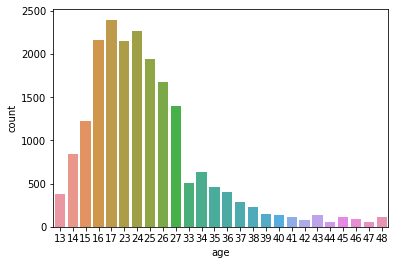

In [ ]:
sns.countplot(x="age", data=df)

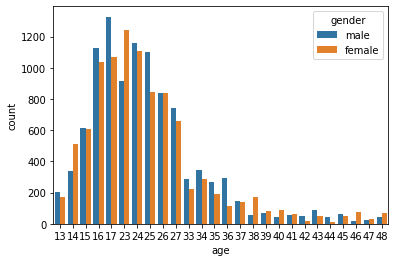

In [ ]:
sns.countplot(x="age", hue="gender", data=df)

In [ ]:
df["age"] = df["age"].astype(str)
df["labels"] = df.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)

In [ ]:
df.drop(columns=["gender","age","sign","topic"],axis =1, inplace = True)
gc.collect()

50

In [ ]:
df.head()

,text,labels
0,the classroom future when i opportunity share ...,"[male, 16, Student, Sagittarius]"
1,i worked nothing today i accepted job phone wi...,"[female, 33, indUnk, Scorpio]"
2,urllink he does look better,"[male, 40, Communications-Media, Pisces]"
3,right richit ricky ricardo hath invited make f...,"[male, 13, indUnk, Taurus]"
4,well afternbspsix weeks punjab finally learned...,"[male, 24, Science, Scorpio]"


In [ ]:
# Train and test split

from sklearn.model_selection import train_test_split

X = df.text
y = df.labels

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=42,
                                                   test_size = 0.1,
                                                  shuffle = True)

In [ ]:
print("shape of training set :", X_train.shape)
print("shape of test set :", X_test.shape)

shape of training set : (18000,)
shape of test set : (2000,)


Vectorizing the features
1. Bag of words 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')

In [ ]:
corpus = list(X_train)+list(X_test)

In [ ]:
ctv.fit(corpus)

CountVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [ ]:
xtrain_ctv = ctv.transform(X_train)

In [ ]:
xtest_ctv = ctv.transform(X_test)

In [ ]:
print(len(ctv.vocabulary_))

3190763


In [ ]:
ctv.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '0 0',
 '0 0 telnet',
 '0 023',
 '0 023 tattoos',
 '0 1',
 '0 1 1',
 '0 1 cup',
 '0 1 people',
 '0 10']

In [ ]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1
        
label_counts


{'13': 375,
 '14': 848,
 '15': 1223,
 '16': 2161,
 '17': 2399,
 '23': 2158,
 '24': 2263,
 '25': 1944,
 '26': 1673,
 '27': 1399,
 '33': 506,
 '34': 634,
 '35': 461,
 '36': 408,
 '37': 285,
 '38': 226,
 '39': 150,
 '40': 131,
 '41': 118,
 '42': 73,
 '43': 136,
 '44': 51,
 '45': 115,
 '46': 92,
 '47': 60,
 '48': 111,
 'Accounting': 115,
 'Advertising': 121,
 'Agriculture': 35,
 'Aquarius': 1494,
 'Architecture': 43,
 'Aries': 1771,
 'Arts': 995,
 'Automotive': 36,
 'Banking': 112,
 'Biotech': 67,
 'BusinessServices': 141,
 'Cancer': 1918,
 'Capricorn': 1487,
 'Chemicals': 116,
 'Communications-Media': 613,
 'Construction': 35,
 'Consulting': 176,
 'Education': 889,
 'Engineering': 331,
 'Environment': 19,
 'Fashion': 138,
 'Gemini': 1585,
 'Government': 188,
 'HumanResources': 114,
 'Internet': 442,
 'InvestmentBanking': 45,
 'Law': 251,
 'LawEnforcement-Security': 59,
 'Leo': 1642,
 'Libra': 1815,
 'Manufacturing': 72,
 'Maritime': 10,
 'Marketing': 141,
 'Military': 93,
 'Museums-Librar

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Transform between iterable of iterables and a multilabel format
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))


y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [ ]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))

def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'),
                    n_jobs=-1)),])
LogReg_pipeline.fit(xtrain_ctv, y_train)

Y_predicted_oneVsRest = LogReg_pipeline.predict(xtest_ctv)

In [ ]:
display_metrics_micro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0005
F1 score: Micro 0.2524713325425069
Average precision score: Micro 0.13835198487712666
Average recall score: Micro 0.159625


In [ ]:
display_metrics_macro(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0005
F1 score: Macro 0.017573215552198117
Average recall score: MAcro 0.016641902021120022


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
display_metrics_weighted(y_test,Y_predicted_oneVsRest)

Accuracy score:  0.0005
F1 score: weighted 0.1641903318087812
Average precision score: weighted 0.2360905271231741
Average recall score: weighted 0.159625


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import random 

def print_predicted(y_predicted, y_test = y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])
        print("=================x==================x================x==========")

In [ ]:
print_predicted(y_predicted=Y_predicted_oneVsRest,y_test=y_test, n= 10)

[1940, 736, 1945, 1531, 1209, 1552, 1690, 741, 1830, 402]
('male',)
('26', 'Virgo', 'indUnk', 'male')
=================x==================x================x==========
('male',)
('27', 'Taurus', 'indUnk', 'male')
=================x==================x================x==========
('female',)
('25', 'Leo', 'female', 'indUnk')
=================x==================x================x==========
('male',)
('35', 'Aquarius', 'Religion', 'male')
=================x==================x================x==========
('male',)
('15', 'Student', 'Virgo', 'male')
=================x==================x================x==========
('female',)
('25', 'Aquarius', 'Student', 'male')
=================x==================x================x==========
('male',)
('24', 'Libra', 'Technology', 'male')
=================x==================x================x==========
('female',)
('15', 'Libra', 'Student', 'male')
=================x==================x================x==========
('male',)
('34', 'Cancer', 'female', 'indUnk')
=

* Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predicted_oneVsRest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        95
           2       0.00      0.00      0.00       115
           3       0.00      0.00      0.00       220
           4       0.00      0.00      0.00       256
           5       1.00      0.00      0.01       211
           6       0.00      0.00      0.00       228
           7       1.00      0.00      0.01       201
           8       0.00      0.00      0.00       149
           9       0.00      0.00      0.00       143
          10       0.00      0.00      0.00        59
          11       0.00      0.00      0.00        64
          12       0.00      0.00      0.00        54
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        16
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
